In [1]:
import csv
import tweepy
from dotenv import dotenv_values
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#pip install tweepy

In [16]:
config = dotenv_values(".env")

In [17]:
accessToken = config["ACCESS_TOKEN"]
accessTokenSecret = config["ACCESS_TOKEN_SECRET"]
apiKey = config["API_KEY"]
apiSecret = config["API_KEY_SECRET"]
bearerToken = config["BEARER_TOKEN"]

In [19]:
#apiKey

In [18]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler(apiKey, apiSecret) #API Keys
auth.set_access_token(accessToken, accessTokenSecret) #Access tokens

In [24]:
# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [25]:
# Define the search query and date range
query = "Ronnie O'Sullivan OR #RonnieOSullivan -filter:retweets" #Search his name or hashtag of it
startDate = "2022-01-01"
endDate = "2022-12-31"

In [26]:
# Iterate through pages of results and save to CSV file
csvFile = open("ronnieTweets.csv", "w") #Name of file and write mode
csvWriter = csv.writer(csvFile)

for page in tweepy.Cursor(api.search_tweets, q=query, lang="en", since_id=startDate, until=endDate).pages():
    for tweet in page:
        csvWriter.writerow([tweet.id, tweet.created_at, tweet.text])
        
csvFile.close()

Forbidden: 403 Forbidden
453 - You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve

Let this in to show the futility of it all. Twitter v2 endpoints only allow someone to search for recent tweets. Unsuitable for this project

In [28]:
import requests
import json
from twitter_stream import FilteredStream

In [33]:
search_url = "https://api.twitter.com/2/tweets/search/recent"

query_params = {
    #Escaping the character \\"
    "query" : "\"Ronnie O'Sullivan\" -is:retweet",
    "max_results" : "100",
    "tweet.fields" : "author_id",
    "user.fields" : "name"
}

def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearerToken}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def connect_to_endpoint(url,params):
    response = requests.get(url,auth=bearer_oauth,params=params)#
    return response.json()

json_response = connect_to_endpoint(search_url, query_params)

parsedRes = json.dumps(json_response, indent=4, ensure_ascii=False)
print(parsedRes)

{
    "data": [
        {
            "text": "Ronnie O'Sullivan wordt door velen als de \"Greatest Of All Time\" beschouwd en behaalde in 2022 zijn zevende wereldtitel, waarmee hij op gelijke hoogte als Stephen Hendry kwam. Toch mocht ook dat niet baten, want zowel in 2020 als in 2022 landde hij buiten de top 3.",
            "author_id": "2256824641",
            "id": "1653736033521917953",
            "edit_history_tweet_ids": [
                "1653736033521917953"
            ]
        },
        {
            "text": "Die eerste plaats was voor Steve Davis in 1988. De laatste keer dat snooker in de top 3 is geëindigd dateert van 1990: een tweede plaats voor Stephen Hendry. In 2020 en 2022 was Ronnie O'Sullivan genomineerd.",
            "author_id": "2256824641",
            "id": "1653736028430057473",
            "edit_history_tweet_ids": [
                "1653736028430057473"
            ]
        },
        {
            "text": "@sporza Hij staat op nummer 2 in de wereld. 

Lifted this code from my CA2 in first semester. Based on code in one of Sam's class. 100 tweets is the max I can get. Downloading from archive.org also not doable due to the sheer volume of it all. 

In [53]:
data = pd.read_csv("elonmusk_tweets.csv")

In [54]:
data.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [55]:
data = data.drop("id", axis=1)

In [56]:
data.head()

,created_at,text
0,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [57]:
data["created_at"]

0       2017-04-05 14:56:29
1       2017-04-03 20:01:01
2       2017-04-03 16:59:35
3       2017-04-03 16:30:19
4       2017-04-02 06:05:23
               ...         
2814    2011-12-03 08:22:07
2815    2011-12-03 08:20:28
2816    2011-12-01 10:29:04
2817    2011-12-01 09:55:11
2818    2010-06-04 18:31:57
Name: created_at, Length: 2819, dtype: object

In [58]:
data.dtypes

created_at    object
text          object
dtype: object

In [59]:
data=data.rename(columns={"created_at":"date"})
data["date"]=pd.to_datetime(data["date"],format="%Y/%m/%d")

In [60]:
data.dtypes

date    datetime64[ns]
text            object
dtype: object

In [61]:
data.date[0].year

2017

In [62]:
if data.date[0].year == 2017:
    print("Yes")
else:
    print("No")

Yes


In [63]:
len(data.index)

2819

In [64]:
x = 0;
for y in data.date:
    if y.year == 2017 or y.year == 2010:
        data.drop(x, axis=0, inplace=True)
        x+=1
    else:
        x+=1

In [65]:
data.head()

,date,text
377,2016-12-31 21:30:05,b'HW2 Autopilot software uploading to 1000 car...
378,2016-12-31 02:47:28,"b'@vicentes @DragTimes Late Jan, along with Li..."
379,2016-12-31 02:40:28,"b'@DragTimes Yes, but held up by Autopilot . I..."
380,2016-12-31 02:34:09,b'Resolving an Autopilot HW2 bug that shows up...
381,2016-12-30 19:44:02,b'Churchill (non) quotes \nhttps://t.co/avA4YD...


In [66]:
data.tail()

,date,text
2813,2011-12-04 03:33:52,b'Am reading a great biography of Ben Franklin...
2814,2011-12-03 08:22:07,b'That was a total non sequitur btw'
2815,2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than T..."
2816,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...
2817,2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars o..."


In [67]:
data = data.reset_index()

In [69]:
data.drop("index",axis=1,inplace=True)

In [70]:
data.head()

,date,text
0,2016-12-31 21:30:05,b'HW2 Autopilot software uploading to 1000 car...
1,2016-12-31 02:47:28,"b'@vicentes @DragTimes Late Jan, along with Li..."
2,2016-12-31 02:40:28,"b'@DragTimes Yes, but held up by Autopilot . I..."
3,2016-12-31 02:34:09,b'Resolving an Autopilot HW2 bug that shows up...
4,2016-12-30 19:44:02,b'Churchill (non) quotes \nhttps://t.co/avA4YD...


In [76]:
a = 0;
b = 0;
c = 0;
d = 0;
e = 0;
f = 0;
for y in data.date:
    if y.year == 2011:
        a +=1
    if y.year == 2012:
        b += 1
    if y.year == 2013:
        c += 1
    if y.year == 2014:
        d += 1
    if y.year == 2015:
        e += 1
    if y.year == 2016:
        f += 1       
print(a,b,c,d,e,f)

44 316 478 232 436 935


In [80]:
x = 0;
for y in data.date:
    if y.year == 2016:
        x+=1
    else:
        data.drop(x, axis=0, inplace=True)
        x+=1

In [81]:
data.head()

,date,text
0,2016-12-31 21:30:05,b'HW2 Autopilot software uploading to 1000 car...
1,2016-12-31 02:47:28,"b'@vicentes @DragTimes Late Jan, along with Li..."
2,2016-12-31 02:40:28,"b'@DragTimes Yes, but held up by Autopilot . I..."
3,2016-12-31 02:34:09,b'Resolving an Autopilot HW2 bug that shows up...
4,2016-12-30 19:44:02,b'Churchill (non) quotes \nhttps://t.co/avA4YD...


In [82]:
data.tail()

,date,text
930,2016-01-10 20:11:38,"b""In ~2 years, summon should work anywhere con..."
931,2016-01-10 20:08:28,b'Tap your phone or key and your car will open...
932,2016-01-10 20:04:43,b'First baby step in Tesla Summon capability n...
933,2016-01-02 17:07:03,"b'Worth reading The Machine Stops, an old stor..."
934,2016-01-01 00:19:43,b'Falcon 9 back in the hangar at Cape Canavera...


In [83]:
data.to_csv('2016tweets.csv')

In [2]:
data = pd.read_csv("2016tweets.csv")

In [3]:
data.head()

,Unnamed: 0,date,text
0,0,2016-12-31 21:30:05,b'HW2 Autopilot software uploading to 1000 car...
1,1,2016-12-31 02:47:28,"b'@vicentes @DragTimes Late Jan, along with Li..."
2,2,2016-12-31 02:40:28,"b'@DragTimes Yes, but held up by Autopilot . I..."
3,3,2016-12-31 02:34:09,b'Resolving an Autopilot HW2 bug that shows up...
4,4,2016-12-30 19:44:02,b'Churchill (non) quotes \nhttps://t.co/avA4YD...


In [5]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
data.head()

,date,text
0,2016-12-31 21:30:05,b'HW2 Autopilot software uploading to 1000 car...
1,2016-12-31 02:47:28,"b'@vicentes @DragTimes Late Jan, along with Li..."
2,2016-12-31 02:40:28,"b'@DragTimes Yes, but held up by Autopilot . I..."
3,2016-12-31 02:34:09,b'Resolving an Autopilot HW2 bug that shows up...
4,2016-12-30 19:44:02,b'Churchill (non) quotes \nhttps://t.co/avA4YD...


In [7]:
data.text[0]

"b'HW2 Autopilot software uploading to 1000 cars this eve. Will then hold to verify no field issues and upload to rest of fleet next week.'"

In [9]:
data.text[89]

"b'RT @ggreenwald: Trump Picks Top Climate Skeptic to Lead EPA Transition https://t.co/fTiN4KuKJq'"

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [11]:
sia = SentimentIntensityAnalyzer()

In [12]:
X = data.text

In [13]:
X

0      b'HW2 Autopilot software uploading to 1000 car...
1      b'@vicentes @DragTimes Late Jan, along with Li...
2      b'@DragTimes Yes, but held up by Autopilot . I...
3      b'Resolving an Autopilot HW2 bug that shows up...
4      b'Churchill (non) quotes \nhttps://t.co/avA4YD...
                             ...                        
930    b"In ~2 years, summon should work anywhere con...
931    b'Tap your phone or key and your car will open...
932    b'First baby step in Tesla Summon capability n...
933    b'Worth reading The Machine Stops, an old stor...
934    b'Falcon 9 back in the hangar at Cape Canavera...
Name: text, Length: 935, dtype: object

In [14]:
from nltk.corpus import stopwords

import string
from nltk.stem import PorterStemmer

In [15]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [16]:
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(X)):
    tweet = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    tweet = tweet.lower().split()
    tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
    tweet = ' '.join(tweet)
    cleaned_data.append(tweet)

In [17]:
cleaned_data

['b hw autopilot softwar upload car eve hold verifi field issu upload rest fleet next week',
 'b vicent dragtim late jan along linux kernel upgrad',
 'b dragtim ye held autopilot def work tho shave sec mph amp mile ap goe xe x xa http co kbv qgc',
 'b resolv autopilot hw bug show boot subzero cold soak fix work softwar start upload tmrw',
 'b churchil non quot nhttp co ava yd k g',
 'b rt iridiumcomm mileston alert first ten iridiumnext satellit stack encapsul falcon fair nextevolutio xe x xa',
 'b andrewket almost undergo final valid might go next day',
 'b rt electrekco tesla autopilot xe x x new radar technolog predict accid caught dashcam second later http co f ndvsg hx http xe x xa',
 'b deu ex machina center screen end',
 'b quipm occasion existenti dread inevit think futur',
 'b djsearl fredericlambert ye grid need moder use supercharg non snowi region',
 'b fredericlambert mere kw refer children toy',
 'b yamenalhaddad brain full right hard one',
 'b fredericlambert instal alre

In [20]:
data["Cleaned"] = cleaned_data

In [21]:
data.head()

,date,text,Cleaned
0,2016-12-31 21:30:05,b'HW2 Autopilot software uploading to 1000 car...,b hw autopilot softwar upload car eve hold ver...
1,2016-12-31 02:47:28,"b'@vicentes @DragTimes Late Jan, along with Li...",b vicent dragtim late jan along linux kernel u...
2,2016-12-31 02:40:28,"b'@DragTimes Yes, but held up by Autopilot . I...",b dragtim ye held autopilot def work tho shave...
3,2016-12-31 02:34:09,b'Resolving an Autopilot HW2 bug that shows up...,b resolv autopilot hw bug show boot subzero co...
4,2016-12-30 19:44:02,b'Churchill (non) quotes \nhttps://t.co/avA4YD...,b churchil non quot nhttp co ava yd k g


In [23]:
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [24]:
data['Sentiment'] = data['Cleaned'].apply(get_sentiment)

In [25]:
data.head()

,date,text,Cleaned,Sentiment
0,2016-12-31 21:30:05,b'HW2 Autopilot software uploading to 1000 car...,b hw autopilot softwar upload car eve hold ver...,0.0
1,2016-12-31 02:47:28,"b'@vicentes @DragTimes Late Jan, along with Li...",b vicent dragtim late jan along linux kernel u...,0.0
2,2016-12-31 02:40:28,"b'@DragTimes Yes, but held up by Autopilot . I...",b dragtim ye held autopilot def work tho shave...,0.0
3,2016-12-31 02:34:09,b'Resolving an Autopilot HW2 bug that shows up...,b resolv autopilot hw bug show boot subzero co...,0.0
4,2016-12-30 19:44:02,b'Churchill (non) quotes \nhttps://t.co/avA4YD...,b churchil non quot nhttp co ava yd k g,0.0


In [26]:
data.tail()

,date,text,Cleaned,Sentiment
930,2016-01-10 20:11:38,"b""In ~2 years, summon should work anywhere con...",b year summon work anywher connect land amp bl...,-0.4404
931,2016-01-10 20:08:28,b'Tap your phone or key and your car will open...,b tap phone key car open garag door exit close...,0.0000
932,2016-01-10 20:04:43,b'First baby step in Tesla Summon capability n...,b first babi step tesla summon capabl download...,0.0000
933,2016-01-02 17:07:03,"b'Worth reading The Machine Stops, an old stor...",b worth read machin stop old stori e forster h...,-0.0772
934,2016-01-01 00:19:43,b'Falcon 9 back in the hangar at Cape Canavera...,b falcon back hangar cape canaver damag found ...,-0.3400


In [27]:
data.to_csv('CleanedTweets.csv', index=False)

In [2]:
data = pd.read_csv("CleanedTweets.csv")

In [3]:
data.head()

,date,text,Cleaned,Sentiment
0,2016-12-31 21:30:05,b'HW2 Autopilot software uploading to 1000 car...,b hw autopilot softwar upload car eve hold ver...,0.0
1,2016-12-31 02:47:28,"b'@vicentes @DragTimes Late Jan, along with Li...",b vicent dragtim late jan along linux kernel u...,0.0
2,2016-12-31 02:40:28,"b'@DragTimes Yes, but held up by Autopilot . I...",b dragtim ye held autopilot def work tho shave...,0.0
3,2016-12-31 02:34:09,b'Resolving an Autopilot HW2 bug that shows up...,b resolv autopilot hw bug show boot subzero co...,0.0
4,2016-12-30 19:44:02,b'Churchill (non) quotes \nhttps://t.co/avA4YD...,b churchil non quot nhttp co ava yd k g,0.0


In [4]:
dateRange = pd.date_range(start="2016-01-01", end="2016-12-31")

In [6]:
average_sentiment = data.groupby(data['date'].dt.date)['Sentiment'].mean()

In [7]:
start_date = data['date'].min().date()
end_date = data['date'].max().date()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [8]:
average_sentiment = average_sentiment.reindex(date_range)

In [9]:
average_sentiment

2016-01-01   -0.340000
2016-01-02   -0.077200
2016-01-03         NaN
2016-01-04         NaN
2016-01-05         NaN
                ...   
2016-12-27    0.000000
2016-12-28         NaN
2016-12-29         NaN
2016-12-30    0.180767
2016-12-31    0.000000
Freq: D, Name: Sentiment, Length: 366, dtype: float64

In [10]:
average_sentiment = average_sentiment.fillna(0)

In [11]:
average_sentiment

2016-01-01   -0.340000
2016-01-02   -0.077200
2016-01-03    0.000000
2016-01-04    0.000000
2016-01-05    0.000000
                ...   
2016-12-27    0.000000
2016-12-28    0.000000
2016-12-29    0.000000
2016-12-30    0.180767
2016-12-31    0.000000
Freq: D, Name: Sentiment, Length: 366, dtype: float64

In [15]:
average_sentiment_df = average_sentiment.to_frame(name='average_sentiment').reset_index()

In [16]:
average_sentiment_df.head()

,index,average_sentiment
0,2016-01-01,-0.3400
1,2016-01-02,-0.0772
2,2016-01-03,0.0000
3,2016-01-04,0.0000
4,2016-01-05,0.0000


In [17]:
average_sentiment_df = average_sentiment_df.rename(columns={'index': 'Date', 'average_sentiment': 'Sentiment'})

In [18]:
average_sentiment_df.head()

,Date,Sentiment
0,2016-01-01,-0.3400
1,2016-01-02,-0.0772
2,2016-01-03,0.0000
3,2016-01-04,0.0000
4,2016-01-05,0.0000


In [19]:
average_sentiment_df.to_csv('AverageSentiment.csv', index=False)

In [22]:
missing_dates = ~data['date'].isin(dateRange)

In [23]:
missing_dates

0      True
1      True
2      True
3      True
4      True
       ... 
930    True
931    True
932    True
933    True
934    True
Name: date, Length: 935, dtype: bool

In [24]:
missing_data = data[missing_dates]

In [25]:
missing_data

,date,text,Cleaned,Sentiment
0,2016-12-31 21:30:05,b'HW2 Autopilot software uploading to 1000 car...,b hw autopilot softwar upload car eve hold ver...,0.0000
1,2016-12-31 02:47:28,"b'@vicentes @DragTimes Late Jan, along with Li...",b vicent dragtim late jan along linux kernel u...,0.0000
2,2016-12-31 02:40:28,"b'@DragTimes Yes, but held up by Autopilot . I...",b dragtim ye held autopilot def work tho shave...,0.0000
3,2016-12-31 02:34:09,b'Resolving an Autopilot HW2 bug that shows up...,b resolv autopilot hw bug show boot subzero co...,0.0000
4,2016-12-30 19:44:02,b'Churchill (non) quotes \nhttps://t.co/avA4YD...,b churchil non quot nhttp co ava yd k g,0.0000
...,...,...,...,...
930,2016-01-10 20:11:38,"b""In ~2 years, summon should work anywhere con...",b year summon work anywher connect land amp bl...,-0.4404
931,2016-01-10 20:08:28,b'Tap your phone or key and your car will open...,b tap phone key car open garag door exit close...,0.0000
932,2016-01-10 20:04:43,b'First baby step in Tesla Summon capability n...,b first babi step tesla summon capabl download...,0.0000
933,2016-01-02 17:07:03,"b'Worth reading The Machine Stops, an old stor...",b worth read machin stop old stori e forster h...,-0.0772


In [15]:
data=data.asfreq("MS") #pandas fill gaps with nulls in timeseries

In [5]:
data["date"]=pd.to_datetime(data["date"],format="%Y/%m/%d")

In [29]:
data=data.set_index("date")

In [30]:
data=data.sort_index()

In [27]:
average_sentiment = data.groupby(data['date'].dt.date)['Sentiment'].mean()

In [31]:
average_sentiment

date
2016-01-01   -0.340000
2016-01-02   -0.077200
2016-01-10   -0.146800
2016-01-11   -0.790600
2016-01-12    0.220200
                ...   
2016-12-23    0.184833
2016-12-24    0.094687
2016-12-27    0.000000
2016-12-30    0.180767
2016-12-31    0.000000
Name: Sentiment, Length: 227, dtype: float64

In [32]:
(data.index==pd.date_range(start=data.index.min(),
                          end=data.index.max(),
                          freq=data.index.freq)).all()
#Checks to make sure all dates are there

ValueError: Lengths must match to compare

In [33]:
data.head()

,text,Cleaned,Sentiment
date,,,
2016-01-01 00:19:43,b'Falcon 9 back in the hangar at Cape Canavera...,b falcon back hangar cape canaver damag found ...,-0.3400
2016-01-02 17:07:03,"b'Worth reading The Machine Stops, an old stor...",b worth read machin stop old stori e forster h...,-0.0772
2016-01-10 20:04:43,b'First baby step in Tesla Summon capability n...,b first babi step tesla summon capabl download...,0.0000
2016-01-10 20:08:28,b'Tap your phone or key and your car will open...,b tap phone key car open garag door exit close...,0.0000
2016-01-10 20:11:38,"b""In ~2 years, summon should work anywhere con...",b year summon work anywher connect land amp bl...,-0.4404


In [34]:
steps=36
data_train=data[:-steps]
data_test=data[-steps:]

In [35]:
print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Train dates : 2016-01-01 00:19:43 --- 2016-12-18 03:57:16  (n=899)
Test dates  : 2016-12-18 04:13:06 --- 2016-12-31 21:30:05  (n=36)


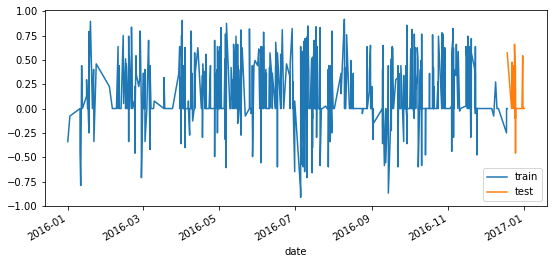

In [40]:
fig, ax=plt.subplots(figsize=(9,4))
data_train['Sentiment'].plot(ax=ax, label='train')
data_test['Sentiment'].plot(ax=ax, label="test")
ax.legend();

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

In [43]:
forecaster = ForecasterAutoreg(
regressor=RandomForestRegressor(random_state=123),
lags=6)

In [44]:
forecaster.fit(y=data_train["Sentiment"])
forecaster

C:\Users\yamyu\AppData\Roaming\Python\Python39\site-packages\skforecast\utils\utils.py:616: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\yamyu\AppData\Roaming\Python\Python39\site-packages\skforecast\utils\utils.py:616: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 898] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-05-16 15:41:19 
Last fit date: 2023-05-16 15:41:37 
Skforecast version: 0.7.0 
Python version: 3.9.12 
Forecaster id: None 

In [45]:
steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head()

C:\Users\yamyu\AppData\Roaming\Python\Python39\site-packages\skforecast\utils\utils.py:674: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


6     0.334434
7     0.201668
8     0.263090
9     0.198027
10    0.166607
Name: pred, dtype: float64

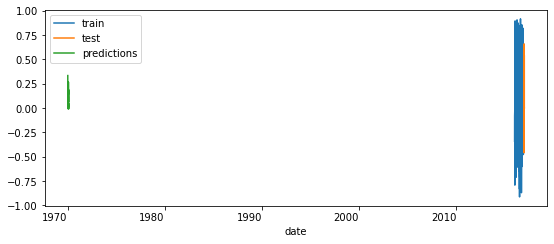

In [47]:
fig, ax = plt.subplots(figsize=(9, 4))
data_train['Sentiment'].plot(ax=ax, label='train')
data_test['Sentiment'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();